# Regression with ML, tabular data and not tree based

**Author**: Jonathan TRICARD

**Summary**: using a dataset propose by scikit-learn, we build an Support Vector Regression model to predict the price of a house. Then, we try to use intelligibility on the model with the the conditions tabular data and not tree based.

**ExplainML**: create a HTML report to have visualizations to explain how machine learning model works.

## Import libraries

In [1]:
import pandas as pd 

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

from readml.logger import ROOT_DIR
from readml.explainers.ml.explain_ml import ExplainML 

## Import data

In [2]:
def create_and_split_dataframe():
    dict_data = fetch_california_housing()
    X = pd.DataFrame(dict_data["data"], columns=dict_data["feature_names"])
    y = pd.DataFrame(dict_data["target"], columns=dict_data["target_names"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    df_train = X_train.copy()
    df_train[y_train.columns.values[0]] = y_train
    df_test = X_test.copy()
    df_test[y_test.columns.values[0]] = y_test
    return X_train, X_test, y_train, y_test, df_train, df_test

In [3]:
X_train, X_test, y_train, y_test, df_train, df_test = create_and_split_dataframe() 

## Train model

In [4]:
svr = SVR(kernel='rbf', gamma=0.1)
svr.fit(X_train, y_train)

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(gamma=0.1)

In [5]:
y_pred = svr.predict(X_test) 

In [6]:
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print("MAE : ", mae_svr)
print("MSE : ", mse_svr)
print("R2 : ", r2_svr)

MAE :  0.8109353898113059
MSE :  1.1628108923005855
R2 :  0.1140759163258358


## Make intelligibility with readml

**WARNINGS**: Take care of change de config_local.cfg to adapt it to the use case, you may need to re run ```pip install -e .``` after the change in the configuration.

In [9]:
model_explain = svr # The model you use
task = "regression" # here we try to solve a regression problem
tree_based_model = False # if you use a tree based model
features_name = list(X_train.columns) # all the features without de target column
features_to_interpret = features_name # the features on which you want to make intelligibility
target_col = list(y_train.columns)[0] # the tagets columns
out_path = "../outputs/notebooks/" # the path where you want to save the report
os.makedirs(os.path.join(ROOT_DIR, out_path))

In [10]:
exp = ExplainML(
        model=model_explain,
        task_name=task,
        tree_based_model=tree_based_model,
        features_name=features_name,
        features_to_interpret=features_to_interpret,
        target_col=target_col,
        out_path=out_path,
    )

  2022-04-06 12:09:18,768 --- readml --- INFO --- Directory created ./outputs 
  2022-04-06 12:09:18,788 --- readml --- INFO --- Directory created ./outputs/local_interpretation 
  2022-04-06 12:09:18,800 --- readml --- INFO --- Directory created ./outputs/global_interpretation 


In [11]:
exp.global_ale(df_train.head()) # SVR take time to decrease runtime we use .head() 

  2022-04-06 12:09:20,969 --- readml --- INFO --- Computing ALE
  2022-04-06 12:09:21,408 --- readml --- INFO --- Saving ALE plots in ./outputs/global_interpretation


In [12]:
exp.global_pdp_ice(df_train.head(100)) 

  2022-04-06 12:09:21,587 --- readml --- INFO --- Computing PDP & ice
  2022-04-06 12:09:24,421 --- readml --- INFO --- Saving PD plots in ./outputs/global_interpretation
  2022-04-06 12:09:24,564 --- readml --- INFO --- Saving ICE plots in ./outputs/global_interpretation


  2022-04-06 12:09:24,789 --- readml --- INFO --- Computing SHAP
  2022-04-06 12:09:24,791 --- readml --- INFO --- You are using a non tree based model, if it's not the case, please set tree_based_model to True in config/config_{type_env}.cfg
/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



  0%|          | 0/100 [00:00<?, ?it/s]

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-package

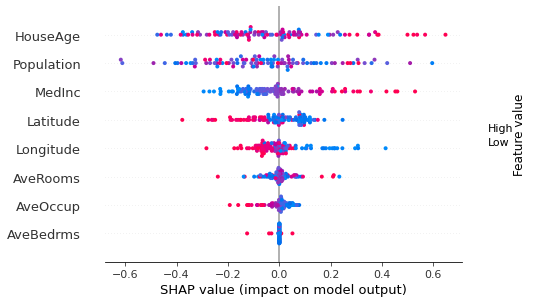

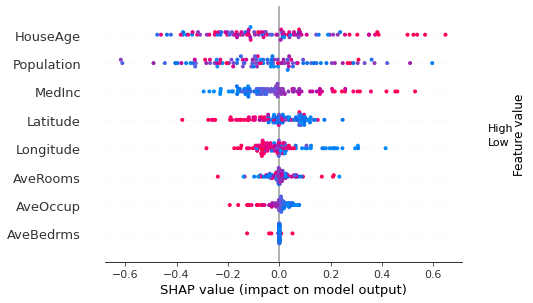

In [13]:
exp.global_shap(df_train.head(100)) 

In [14]:
exp.local_shap(df_test.head()) # be careful it will produce one output by rows  

  2022-04-06 12:10:44,894 --- readml --- INFO --- You are using a non tree based model, if it's not the case, please set tree_based_model to True in config/config_{type_env}.cfg
/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



  0%|          | 0/5 [00:00<?, ?it/s]

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/home/sihihi/.local/lib/python3.7/site-package